<a href="https://colab.research.google.com/github/Mohd6288/DAMLCP_Project/blob/main/08_diffusion_1_inference_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive/',force_remount=True)

import os
os.chdir('/content/drive/MyDrive/DMLCP-main/DMLCP-main/python') # to change to another directory

Mounted at /content/drive/


In [4]:
from pathlib import Path
from huggingface_hub import notebook_login
if not (Path.home()/'.huggingface'/'token').exists():
    notebook_login()

# Diffusion 1

## Inference 1

Adapted from the [fast.ai repo](https://github.com/fastai/diffusion-nbs).

## Workflow

#### Drive

If you need to load/save to your drive:

```python
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive/')

import os
os.chdir('drive/My Drive/IS53055B-DMLCP/DMLCP/python') # to change to another directory
```

#### Huggingface login

For some models and datasets, and if you want to push your model to HF (same as GitHub, but for models) you need to be logged into your HF account.

For that, you need to create an account [here](https://huggingface.co/) and then to ['/settings/tokens'](https://huggingface.co/settings/tokens) to create an access token.

```python
from pathlib import Path
from huggingface_hub import notebook_login
if not (Path.home()/'.huggingface'/'token').exists():
    notebook_login()
```

#### Install

1. On Colab, just use `pip` to install Huggingface libraries (see below).

2. Locally, the install is the same as the one used for Language models, see [`setup.md`](https://github.com/jchwenger/DMLCP/blob/main/setup.md#pytorch--huggingfacegradio).

In [5]:
import sys

if 'google.colab' in sys.modules:
    !pip install --upgrade transformers diffusers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 114.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2


In [6]:
from pathlib import Path

from PIL import Image
import matplotlib.pyplot as plt

import torch

# Get cpu, gpu or mps device for training.
# See: https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html#creating-models
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

from diffusers import StableDiffusionPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [7]:
torch.manual_seed(1)

In [8]:
MODEL_ID = "CompVis/stable-diffusion-v1-4"
# Check out other models by CompVis, different flavours: https://huggingface.co/CompVis
# Runway also has a few: https://huggingface.co/runwayml, for instance "runwayml/stable-diffusion-v1-5"
# or Stability AI (scroll down to models): https://huggingface.co/stabilityai?search_models=stable-diffusion

pipe = StableDiffusionPipeline.from_pretrained(
    MODEL_ID,
    variant="fp16",
    torch_dtype=torch.float16,
    safety_checker = None # remove NSFW filter
).to(device)

# Note:  removing the filter is no licence to do harm, it is to give *you* the responsibility
# of your use. (Also, the HF safety_checker is very, very conservative, and rejects
# a lot of abstract images.)
# (you can also do it later btw: pipe.safety_checker = None)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [9]:
prompt = "a photograph of an astronaut riding a horse"

  0%|          | 0/50 [00:00<?, ?it/s]

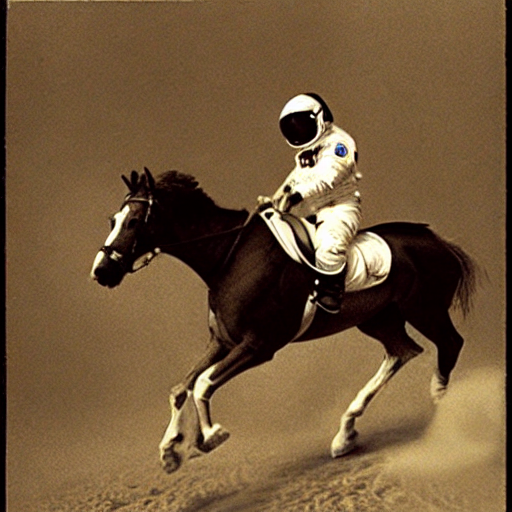

In [10]:
pipe(prompt).images[0] # you can generate rectangular images by passing
                       # a height and a width argument

The seed allows you to control randomness / reproduce your outputs.

  0%|          | 0/50 [00:00<?, ?it/s]

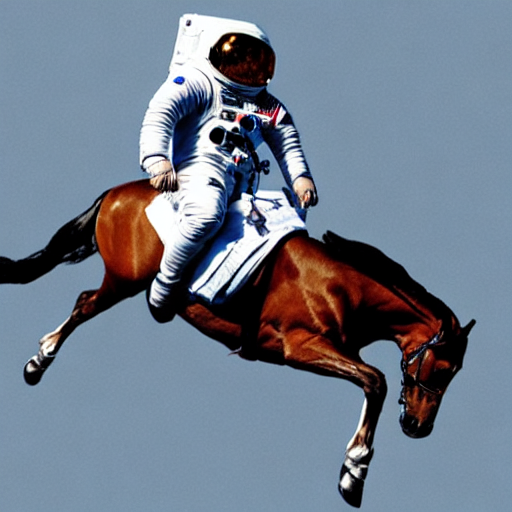

In [11]:
torch.manual_seed(1024)
pipe(prompt).images[0]

See the process of generation

  0%|          | 0/3 [00:00<?, ?it/s]

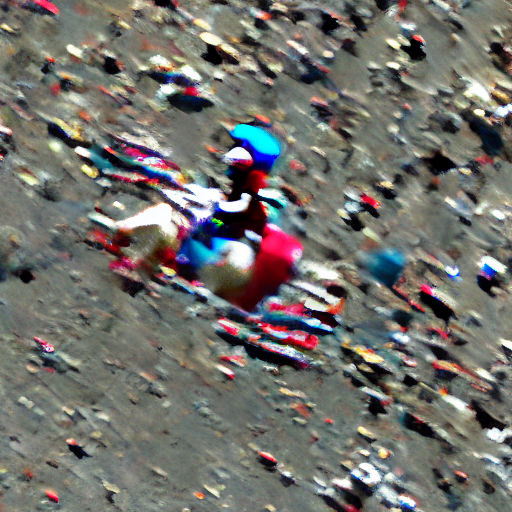

In [12]:
torch.manual_seed(1024)
pipe(prompt, num_inference_steps=3).images[0]

  0%|          | 0/16 [00:00<?, ?it/s]

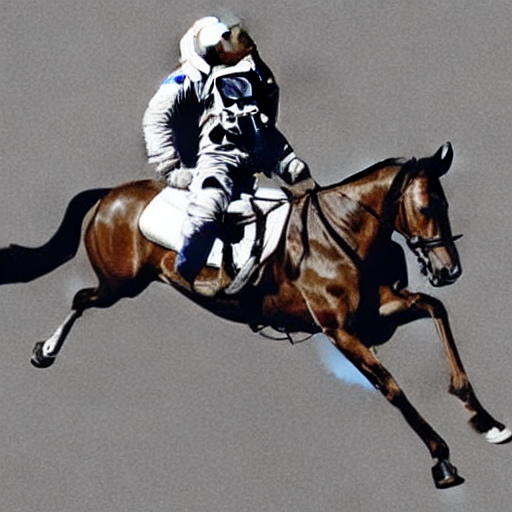

In [13]:
torch.manual_seed(1024)
pipe(prompt, num_inference_steps=16).images[0]

## The Classifier Guidance Parameter

The higher it is, the more closely the model will try and stick to the prompt. A lower number produces more random (creative?) results.

Default: 7.5

In [14]:
num_rows,num_cols = 4,4
prompts = [prompt] * num_cols

In [15]:
guidances = [1.1,3,7,14]
result = [pipe(prompts, guidance_scale=g).images for g in guidances]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [16]:
result

[[<PIL.Image.Image image mode=RGB size=512x512>,
  <PIL.Image.Image image mode=RGB size=512x512>,
  <PIL.Image.Image image mode=RGB size=512x512>,
  <PIL.Image.Image image mode=RGB size=512x512>],
 [<PIL.Image.Image image mode=RGB size=512x512>,
  <PIL.Image.Image image mode=RGB size=512x512>,
  <PIL.Image.Image image mode=RGB size=512x512>,
  <PIL.Image.Image image mode=RGB size=512x512>],
 [<PIL.Image.Image image mode=RGB size=512x512>,
  <PIL.Image.Image image mode=RGB size=512x512>,
  <PIL.Image.Image image mode=RGB size=512x512>,
  <PIL.Image.Image image mode=RGB size=512x512>],
 [<PIL.Image.Image image mode=RGB size=512x512>,
  <PIL.Image.Image image mode=RGB size=512x512>,
  <PIL.Image.Image image mode=RGB size=512x512>,
  <PIL.Image.Image image mode=RGB size=512x512>]]

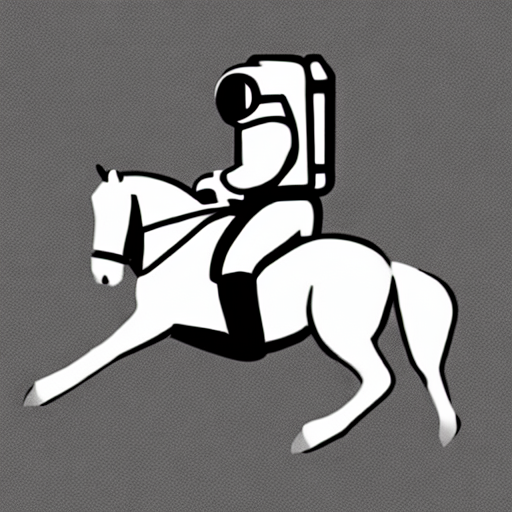

In [17]:
result[-1][0] # Colab is smart, it displays PIL images automatically

A convenience function to display a batch of images.

In [18]:
# https://matplotlib.org/stable/gallery/axes_grid1/simple_axesgrid.html
from mpl_toolkits.axes_grid1 import ImageGrid

def plot_images(imgs, rows=1, cols=None, figsize=(12,8), title=None):
    fig = plt.figure(figsize=figsize)   # control figure size
    grid = ImageGrid(
        fig, 111,                       # similar to subplot(111) | see: https://stackoverflow.com/a/11404223
        nrows_ncols=(rows, cols if cols is not None else len(imgs)),  # creates one row of images
        axes_pad=0.1,                   # pad between axes in inch
    )
    if title is not None:
        # https://matplotlib.org/3.2.1/gallery/subplots_axes_and_figures/figure_title.html
        fig.suptitle(title, x=0, y=0.5)

    # Iterating over the grid returns the Axes.
    for ax, im in zip(grid, imgs):
        # no x/y ticks: https://stackoverflow.com/a/45149018, https://stackoverflow.com/a/58535290
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(im)

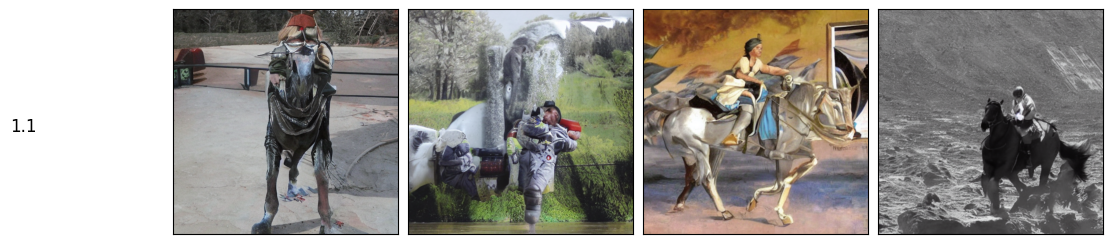

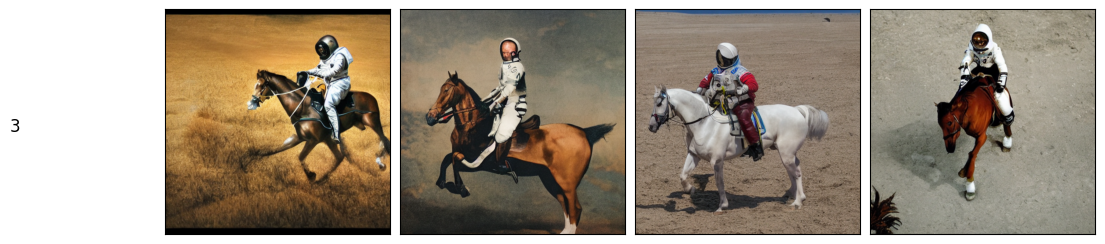

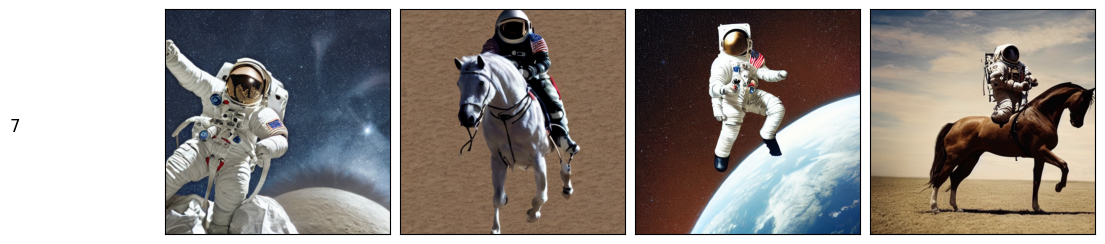

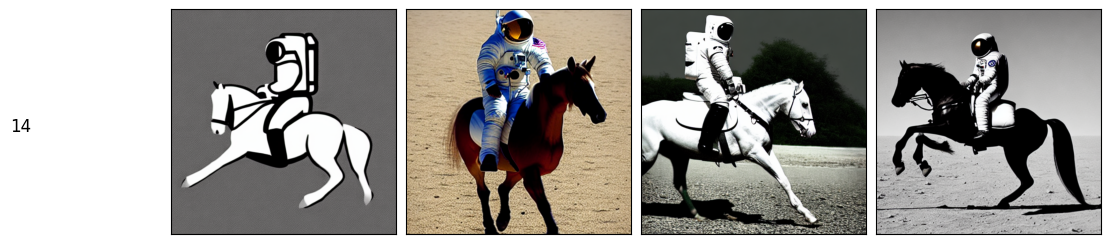

In [19]:
for imgs, g in zip(result, guidances):
    plot_images(imgs, title=g)

## Negative Prompts

  0%|          | 0/50 [00:00<?, ?it/s]

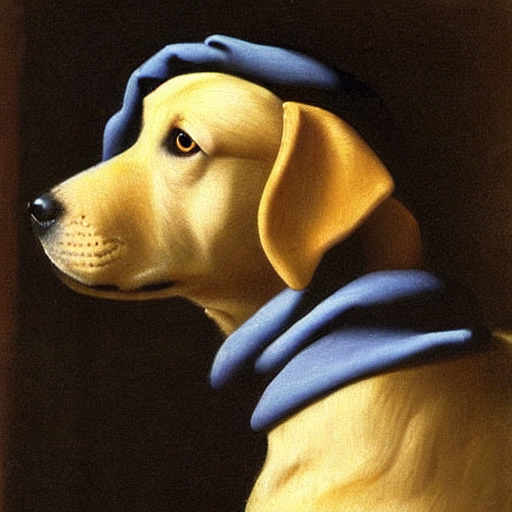

In [20]:
torch.manual_seed(1000)
prompt = "Labrador in the style of Vermeer"
pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

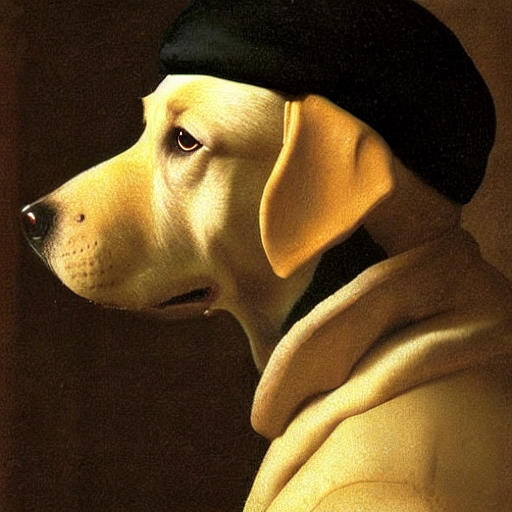

In [21]:
torch.manual_seed(1000)
pipe(prompt, negative_prompt="blue").images[0]

## Deeper

For a deeper dive, that unpacks what is going on under the hood when invoking `pipe`, check out [the official Huggingface inference notebook](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb#scrollTo=yW14FA-tDQ5n). One thing this deeper dive can be used for is, for instance, to save the intermediate steps of the denoising process (to make gifs/videos).

---

## Experiments

1. Test everything!
  - Come up with your own prompts!
  - Set yourself a specific theme, and test various styles (photo, oil on canvas, vaporwave, names of artists, etc.)
  - Search for different [models](https://huggingface.co/models?other=stable-diffusion-diffusers)! (Some of them may exceed your GPU capacity, beware).
2. Make sure you understand and develop an intuition of:
  - the `torch.manual_seed()`: make sure you try repeating your own results!
  - the `num_inference_steps` parameter (a lot of possibilities open to you exploring *very few steps*!)
  - the `plot_images` function
  - the use of Python loops to test an array of things (seeds, guidances, prompts, etc.)
3. Research prompting tricks, here are resources:
  - [Lexica](https://lexica.art/)
  - [PromptHero](https://prompthero.com/)
  - [PromptBook, by OpenArt](https://openart.ai/promptbook)
  - [Reddit](https://www.reddit.com/r/StableDiffusion/)
  - After a while, searching online and making your own tests, you may notice that the style you obtain really feels a bit repetitive: is there a way you can push through that and find strange, unexpected edge cases?
4. Test negative prompting: when does it work, when not?
5. Can you think of a way to introduce computational thinking into this? Ideas:
  - Take a piece of text, slice it into parts, and use each part as a prompt, translating the text into a series of images? Perhaps you could extract *tiles* from a text ('abcdef...' → 'abc', 'bcd', 'def', ...)?
  - You could imagine trying to build a random prompt generator (using a list of things, styles, etc.), that will construct a prompt programmatically from bits of texts and generate images using that.
  
There are many models available, including:
  - the recent and higher quality [Stable Diffusion XL](https://huggingface.co/docs/diffusers/using-diffusers/sdxl);
  - the other high quality model [IF by DeepFloyd](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/deepfloyd_if_free_tier_google_colab.ipynb);
  - Music generators: [AudioDiffusion](https://huggingface.co/docs/diffusers/main/en/api/pipelines/audio_diffusion), [AudioLDM](https://huggingface.co/docs/diffusers/main/en/api/pipelines/audioldm), [AudioLDM 2](https://huggingface.co/docs/diffusers/main/en/api/pipelines/audioldm2), [MusicLDM](https://huggingface.co/docs/diffusers/main/en/api/pipelines/musicldm).
  
Each of the pages on Huggingface have some starter code that should be relatively straightforward to set up!
